In [769]:
# Assignment- Linear Regression:STARTS - 12 June 2018
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing and Understanding Data

In [770]:
#Importing dataset
cardf = pd.read_csv('CarPrice_Assignment.csv')
#Get details of the dataframe
print(cardf.info())
print(cardf.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

# Data Sanitization 

In [771]:

#Checking for null values if any
# summing up the missing values (column-wise)
print(cardf.isnull().sum())
#Resut -> No null cells

# columns having at least one missing value
print(cardf.isnull().any())

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64
car_ID              False
symboling           False
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False

In [772]:
# Data Preparation
#Update Car Name column by string operation on CarName column
#extract using '-' seperator
cardf['CarName'] =cardf['CarName'].str.split('-').str[0]
#extract using ' ' seperator
cardf['CarName'] =cardf['CarName'].str.split(' ').str[0]
#check total rows and columns
print(cardf.shape)
#verify the output data frame after string operations
print(cardf.head(10))
print(cardf.tail(10))
#from now we REFER Company Name with CarName

(205, 26)
   car_ID  symboling CarName fueltype aspiration doornumber      carbody  \
0       1          3    alfa      gas        std        two  convertible   
1       2          3    alfa      gas        std        two  convertible   
2       3          1    alfa      gas        std        two    hatchback   
3       4          2    audi      gas        std       four        sedan   
4       5          2    audi      gas        std       four        sedan   
5       6          2    audi      gas        std        two        sedan   
6       7          1    audi      gas        std       four        sedan   
7       8          1    audi      gas        std       four        wagon   
8       9          1    audi      gas      turbo       four        sedan   
9      10          0    audi      gas      turbo        two    hatchback   

  drivewheel enginelocation  wheelbase    ...      enginesize  fuelsystem  \
0        rwd          front       88.6    ...             130        mpfi   

In [773]:
#checking unique values of each columns other than car_ID as its unique and price as we it final varible we need to make analysis
print("symboling:",cardf['symboling'].unique())
print("CarName:",cardf['CarName'].unique())
print("fueltype:",cardf['fueltype'].unique())
print("aspiration:",cardf['aspiration'].unique())
print("doornumber:",cardf['doornumber'].unique())
print("carbody:",cardf['carbody'].unique())
print("drivewheel:",cardf['drivewheel'].unique())
print("enginelocation",cardf['enginelocation'].unique())
print("wheelbase:",cardf['wheelbase'].unique())
print("carlength",cardf['carlength'].unique())
print("carwidth",cardf['carwidth'].unique())
print("carheight",cardf['carheight'].unique())
print("curbweight",cardf['curbweight'].unique())
print("enginetype",cardf['enginetype'].unique())
print("cylindernumber",cardf['cylindernumber'].unique())
print("enginesize",cardf['enginesize'].unique())
print("fuelsystem",cardf['fuelsystem'].unique())
print("boreratio",cardf['boreratio'].unique())
print("stroke",cardf['stroke'].unique())
print("compressionratio",cardf['compressionratio'].unique())
print("horsepower",cardf['horsepower'].unique())
print("peakrpm",cardf['peakrpm'].unique())
print("citympg",cardf['citympg'].unique())
print("highwaympg",cardf['highwaympg'].unique())

symboling: [ 3  1  2  0 -1 -2]
CarName: ['alfa' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar' 'maxda'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan' 'peugeot'
 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru' 'toyota'
 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']
fueltype: ['gas' 'diesel']
aspiration: ['std' 'turbo']
doornumber: ['two' 'four']
carbody: ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drivewheel: ['rwd' 'fwd' '4wd']
enginelocation ['front' 'rear']
wheelbase: [ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  93.   96.3  95.1  97.2 100.4  91.3  99.2
 107.9 114.2 108.   89.5  98.4  96.1  99.1  93.3  97.   96.9  95.7 102.4
 102.9 104.5  97.3 104.3 109.1]
carlength [168.8 171.2 176.6 177.3 192.7 178.2 176.8 189.  193.8 197.  141.1 155.9
 158.8 157.3 174.6 173.2 144.6 150.  163.4 157.1 167.5 175.4 169.1 170.7


In [774]:
#From above output these are few spell mistakes for same company
#Nissan is 2 times with caps and small 'nissan'
#toyota is misspelled as toyouta
#mazda is misspelled as maxda
#volkswagen is misspelled 2 time like vokswagen and vw
#porsche is misspelled as 'porcshce' 

#change all value to lower case before doing string operations
cardf['CarName'] = cardf['CarName'].str.lower()
print(cardf['CarName'].unique())

['alfa' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar' 'maxda'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'porcshce' 'renault' 'saab' 'subaru' 'toyota' 'toyouta'
 'vokswagen' 'volkswagen' 'vw' 'volvo']


In [775]:
#Correct the misspelled values
cardf['CarName'].replace("toyouta","toyota",inplace=True)
cardf['CarName'].replace("maxda","mazda",inplace=True)
cardf['CarName'].replace(["vw","vokswagen"],"volkswagen",inplace=True)
cardf['CarName'].replace("porcshce","porsche",inplace=True)
print(cardf['CarName'].unique())


['alfa' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar' 'mazda'
 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth' 'porsche'
 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


In [776]:
# Understanding the varibale based on data dictionary

#Exploratory Data Analysis to choose the list of variables affecting price - starts
#Renaming specific column'CarName' as 'carCompany' in cardf after checking on Data Ditionary
cardf.rename(columns={'CarName': 'carCompany'}, inplace=True)
#List of categorical varibales 
#Symboling,carCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
print("symboling:",cardf['symboling'].unique())
print("carCompany:",cardf['carCompany'].unique())
print("fueltype:",cardf['fueltype'].unique())
print("aspiration:",cardf['aspiration'].unique())
print("doornumber:",cardf['doornumber'].unique())
print("carbody:",cardf['carbody'].unique())
print("drivewheel:",cardf['drivewheel'].unique())
print("enginelocation",cardf['enginelocation'].unique())
print("enginetype:",cardf['enginetype'].unique())
print("cylindernumber:",cardf['cylindernumber'].unique())
print("fuelsystem:",cardf['fuelsystem'].unique())

symboling: [ 3  1  2  0 -1 -2]
carCompany: ['alfa' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar' 'mazda'
 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth' 'porsche'
 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']
fueltype: ['gas' 'diesel']
aspiration: ['std' 'turbo']
doornumber: ['two' 'four']
carbody: ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drivewheel: ['rwd' 'fwd' '4wd']
enginelocation ['front' 'rear']
enginetype: ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
cylindernumber: ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuelsystem: ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


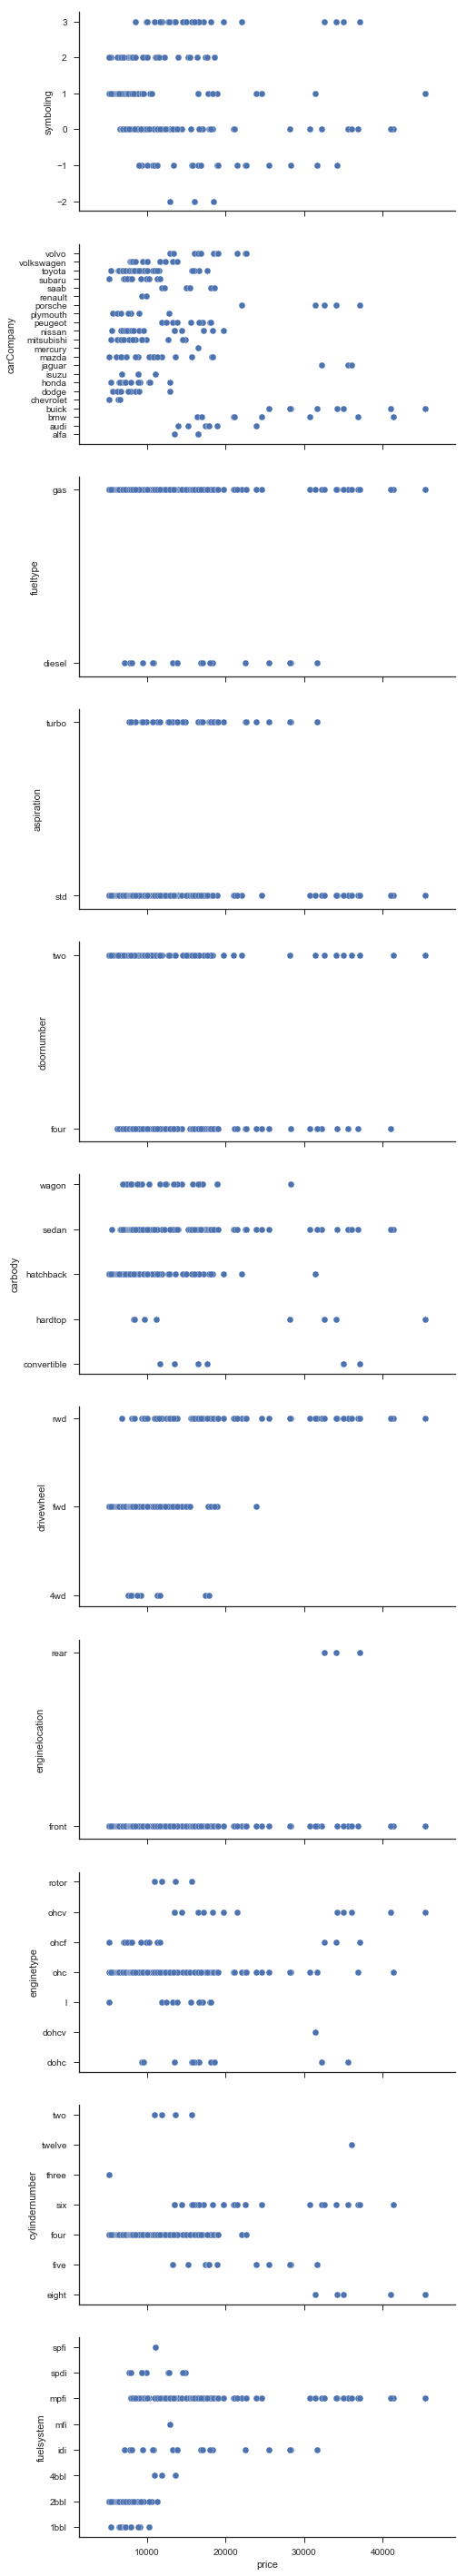

In [777]:
#For primary knowledge checking on each categorical field versus price [Univariant Analysis]
#checking on Symboling,carCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
#plt.figure(figsize=(17,5))

sns.set(style="ticks", color_codes=True)
g=sns.pairplot(data=cardf,
                  x_vars=['price'],
                  y_vars=['symboling','carCompany','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem'])

g.fig.set_size_inches(10,40)

In [778]:
#For primary knowledge checking on each Numerice field versus price [Univariant Analysis]
#List of Numeric varibales 
#wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
print("wheelbase:",cardf['wheelbase'].unique())
print("carlength:",cardf['carlength'].unique())
print("carwidth:",cardf['carwidth'].unique())
print("carheight:",cardf['carheight'].unique())
print("curbweight:",cardf['curbweight'].unique())
print("enginesize:",cardf['enginesize'].unique())
print("boreratio:",cardf['boreratio'].unique())
print("stroke",cardf['stroke'].unique())
print("compressionratio:",cardf['compressionratio'].unique())
print("horsepower:",cardf['horsepower'].unique())
print("peakrpm:",cardf['peakrpm'].unique())
print("citympg:",cardf['citympg'].unique())
print("highwaympg:",cardf['highwaympg'].unique())

wheelbase: [ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  93.   96.3  95.1  97.2 100.4  91.3  99.2
 107.9 114.2 108.   89.5  98.4  96.1  99.1  93.3  97.   96.9  95.7 102.4
 102.9 104.5  97.3 104.3 109.1]
carlength: [168.8 171.2 176.6 177.3 192.7 178.2 176.8 189.  193.8 197.  141.1 155.9
 158.8 157.3 174.6 173.2 144.6 150.  163.4 157.1 167.5 175.4 169.1 170.7
 172.6 199.6 191.7 159.1 166.8 169.  177.8 175.  190.9 187.5 202.6 180.3
 208.1 199.2 178.4 173.  172.4 165.3 170.2 165.6 162.4 173.4 181.7 184.6
 178.5 186.7 198.9 167.3 168.9 175.7 181.5 186.6 156.9 157.9 172.  173.5
 173.6 158.7 169.7 166.3 168.7 176.2 175.6 183.5 187.8 171.7 159.3 165.7
 180.2 183.1 188.8]
carwidth: [64.1 65.5 66.2 66.4 66.3 71.4 67.9 64.8 66.9 70.9 60.3 63.6 63.8 64.6
 63.9 64.  65.2 62.5 66.  61.8 69.6 70.6 64.2 65.7 66.5 66.1 70.3 71.7
 70.5 72.  68.  64.4 65.4 68.4 68.3 65.  72.

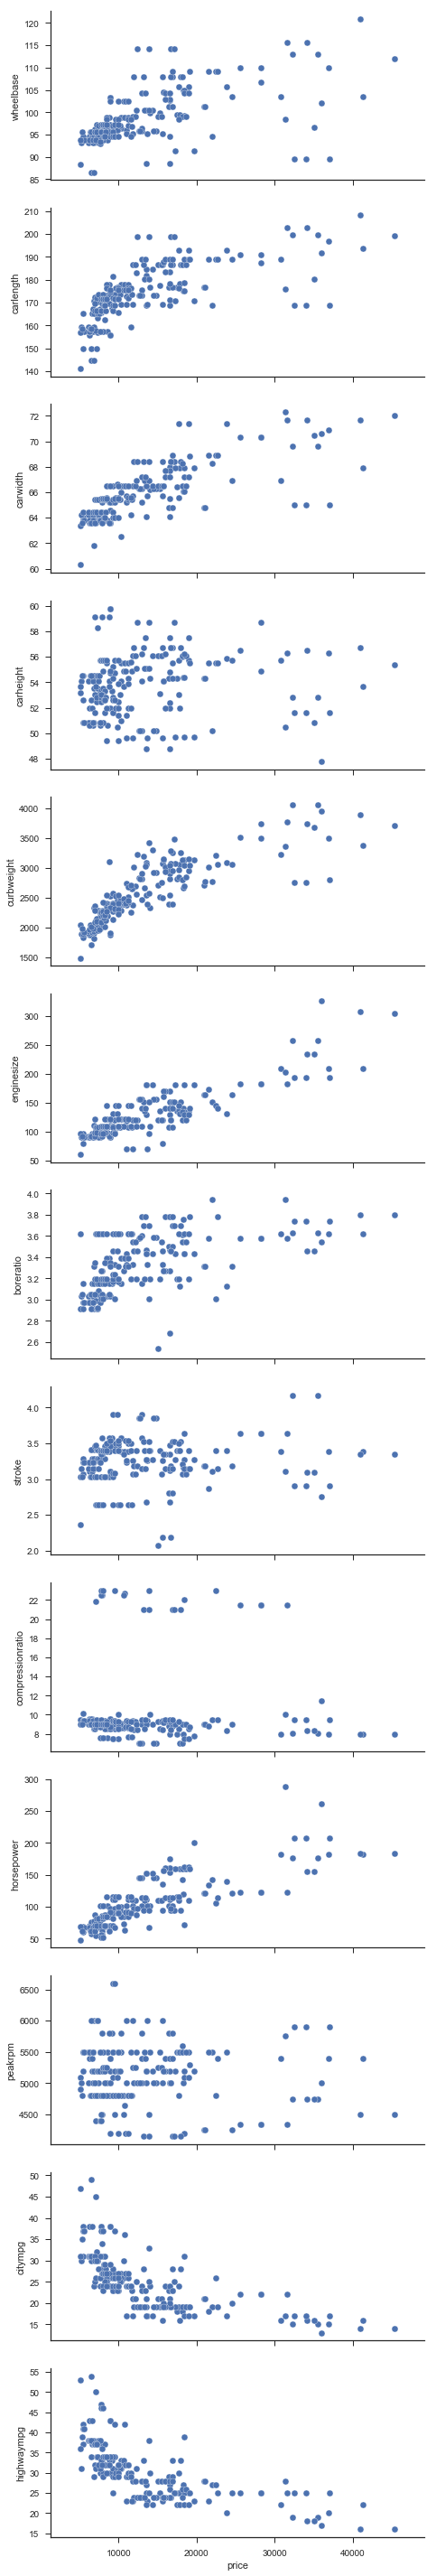

In [779]:
#For primary knowledge checking on each Numerice field versus price [Univariant Analysis]
sns.set(style="ticks", color_codes=True)
g=sns.pairplot(data=cardf,
                  x_vars=['price'],
                  y_vars=['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg'])
g.fig.set_size_inches(10,40)

In [780]:
# default rate
round(np.mean(cardf['price']), 2)

13276.71

In [781]:
# lets define a function to plot price across categorical variables
def plot_cat(cat_var):
    sns.barplot(x=cat_var, y='price', data=cardf)
    plt.show()
    

# EDA - Univariant Analysis on each variable

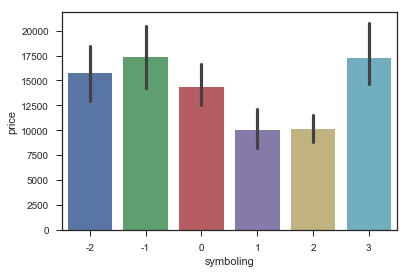

In [782]:
plot_cat('symboling')
#symboling - is high when negative and more positive and consistent from 1 -2
#hence symboling can be binned to low and high price ,if 1 or 2 is the value then low price else high price

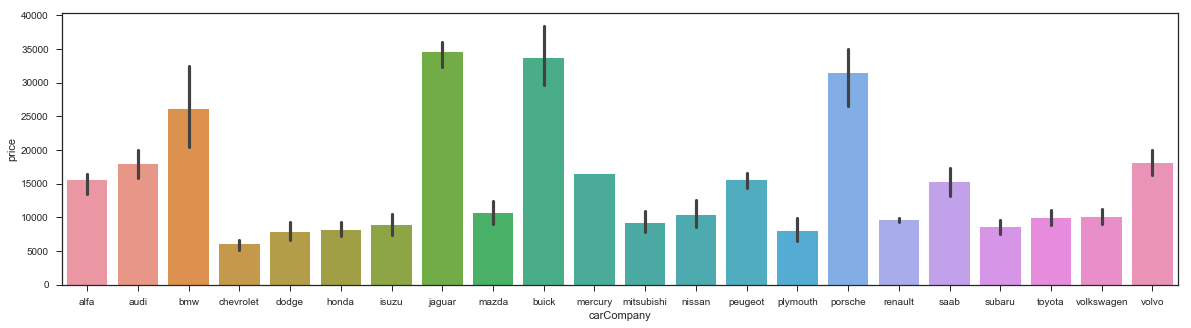

In [783]:
plt.figure(figsize=(20, 5))
plot_cat('carCompany')
#carCompany can be used to list out binning of company as low,medium and high based on price

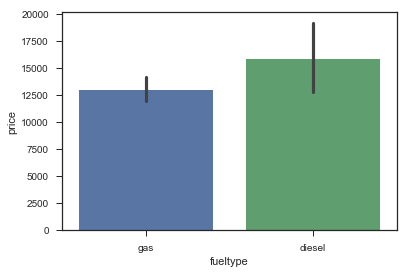

In [784]:
plot_cat('fueltype')
#fueltype doesnot seem to be of significant variable on pricing since mean is around same range

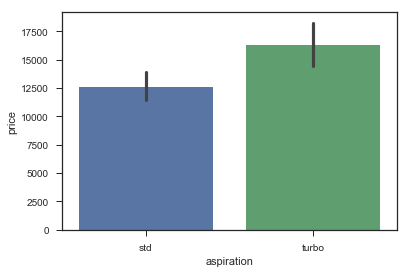

In [785]:
plot_cat('aspiration')
#turbo will be more price and std will less in price

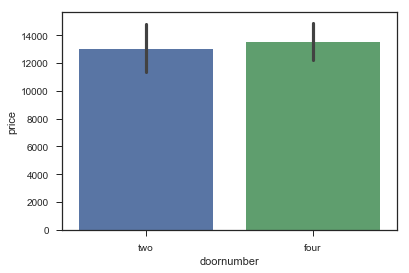

In [786]:
plot_cat('doornumber')
#doornumber doesnot seem to significant varible on pricing

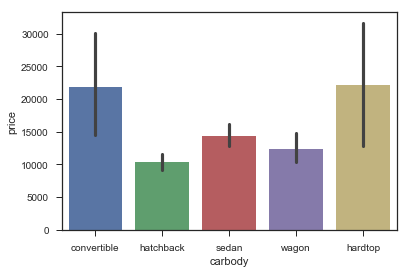

In [787]:
plot_cat('carbody')
#carbody seems to having effect on the car price

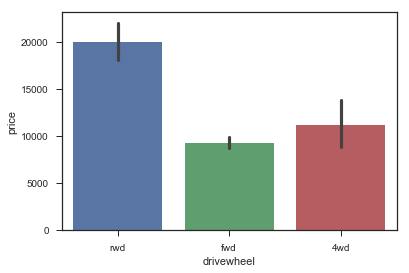

In [788]:
plot_cat('drivewheel')
#drivewheel seems to impacting price as rwd is more price and fwd/4wd low price

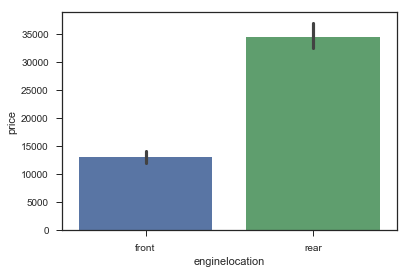

In [789]:
plot_cat('enginelocation')
#enginelocation seems to impacting price as rear  is more price and front is low price
#since drivewheel and enginelocation have similar behavior we can ignore drivewheel

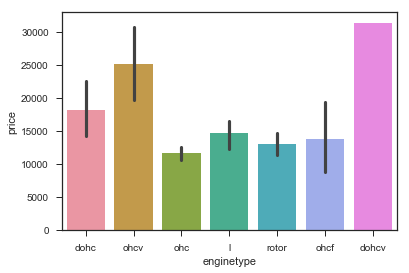

In [790]:
plot_cat('enginetype')
#based on price we have 2 categories low as ohc,l,rotor,ohcf and high for dohc,ohcv,dohcv

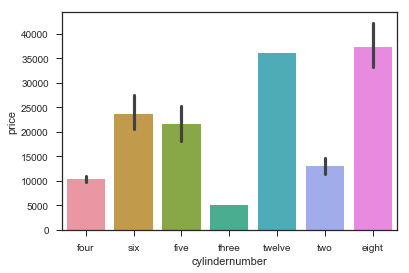

In [791]:
plot_cat('cylindernumber')
#as cylindernumber increase price 

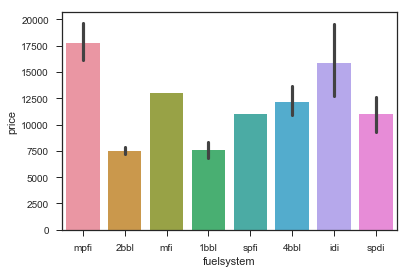

In [792]:
plot_cat('fuelsystem')
#fuelsystem with 2bbl,ibbl are low price when compared others

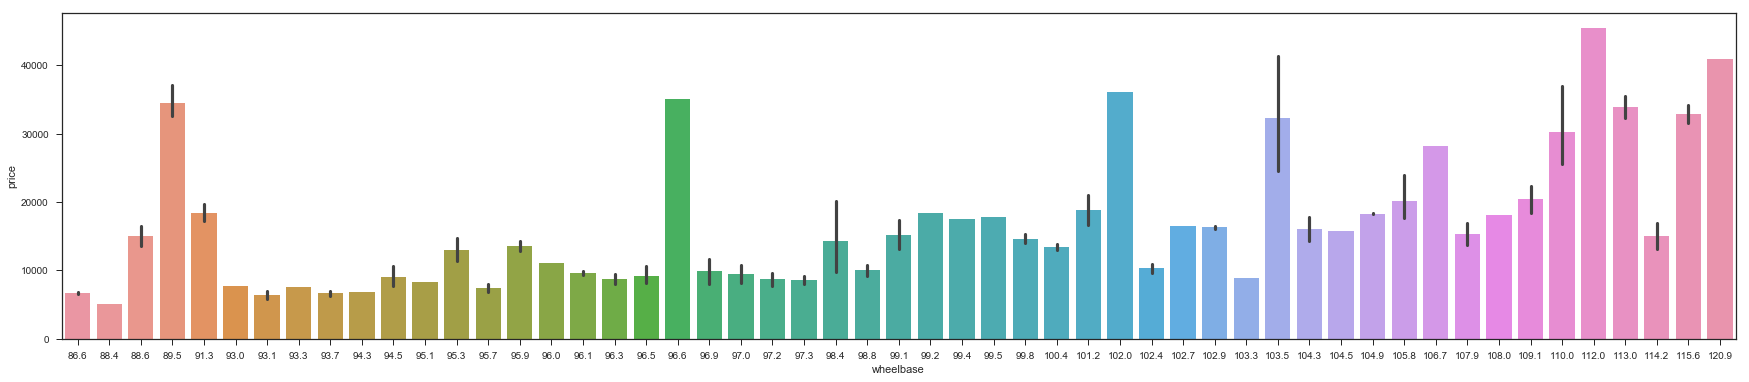

In [793]:
plt.figure(figsize=(30, 6))
plot_cat('wheelbase')
#wheelbase is not having significant impact on price as it distributed

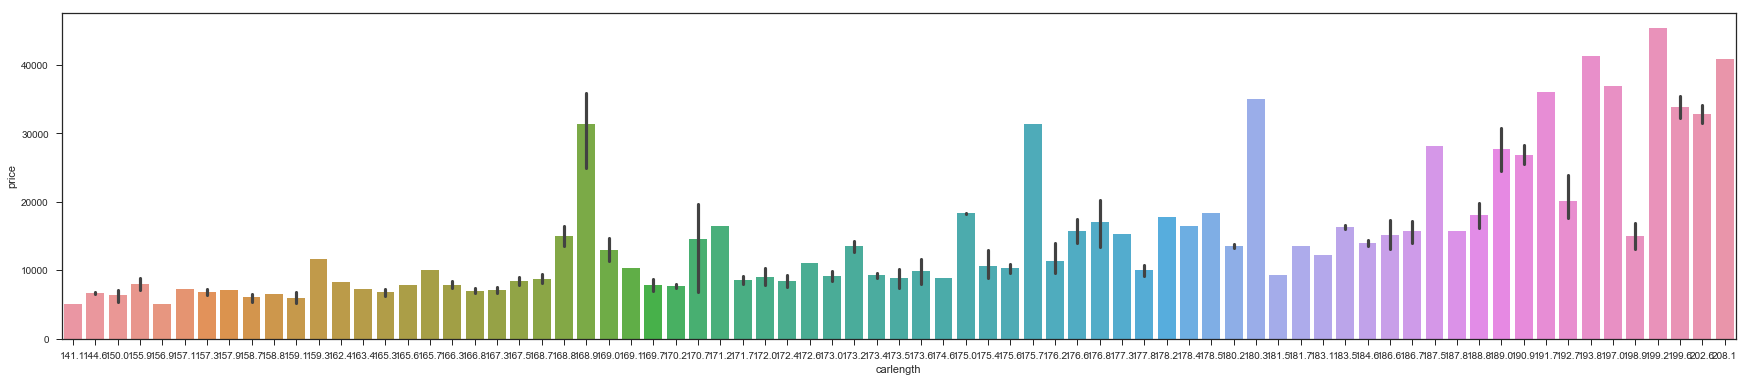

In [794]:
plt.figure(figsize=(30, 6))
plot_cat('carlength')
#As carlength increase price of car is increasing

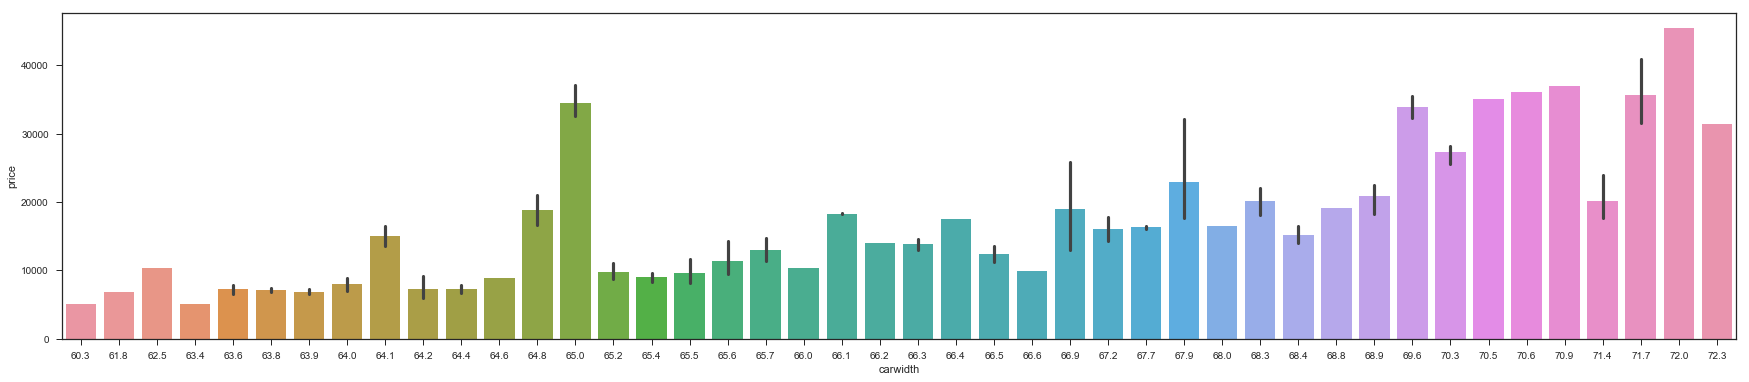

In [795]:
plt.figure(figsize=(30, 6))
plot_cat('carwidth')
#As carwidth increase price of car is increasing

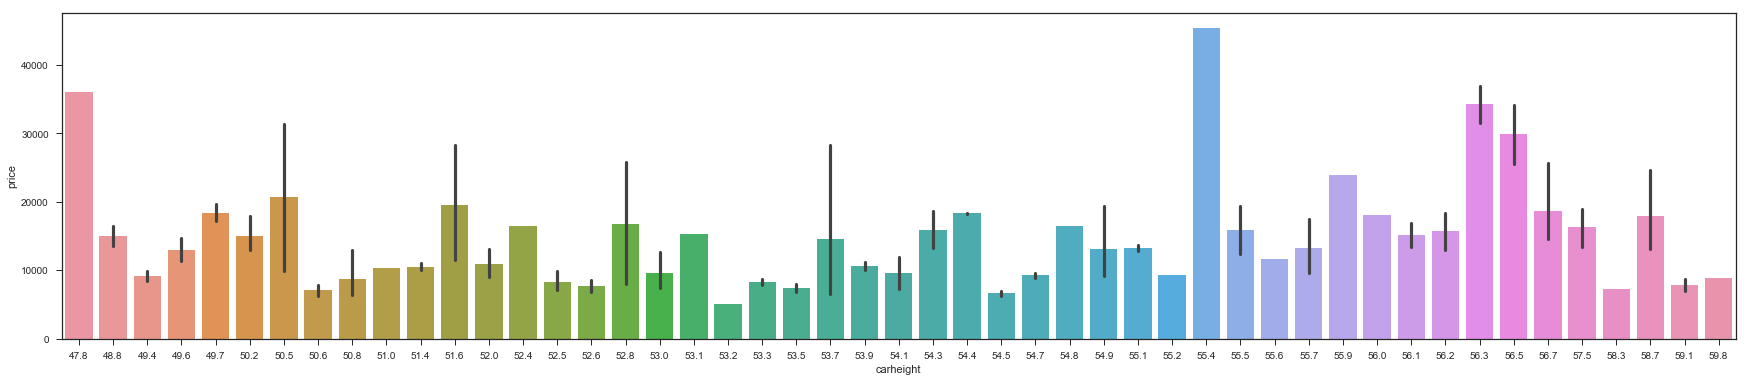

In [796]:
plt.figure(figsize=(30, 6))
plot_cat('carheight')
#carheight is not having significant impact on price as it distributed

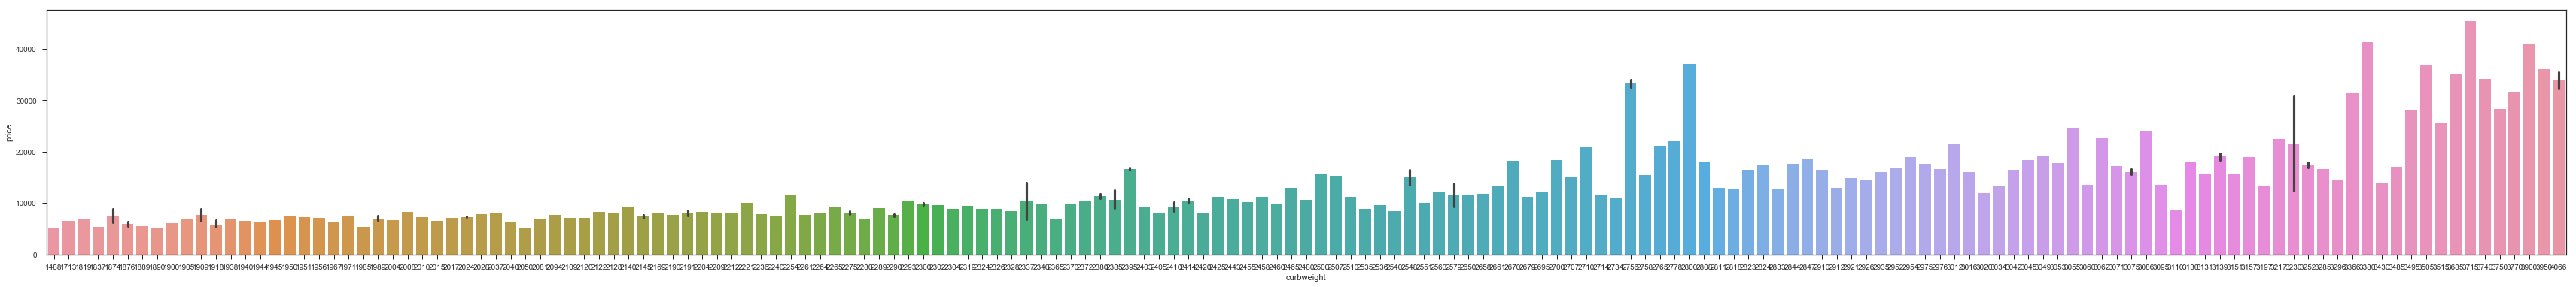

In [797]:
plt.figure(figsize=(60, 6))
plot_cat('curbweight')
#As curbweight increase price of car is increasing

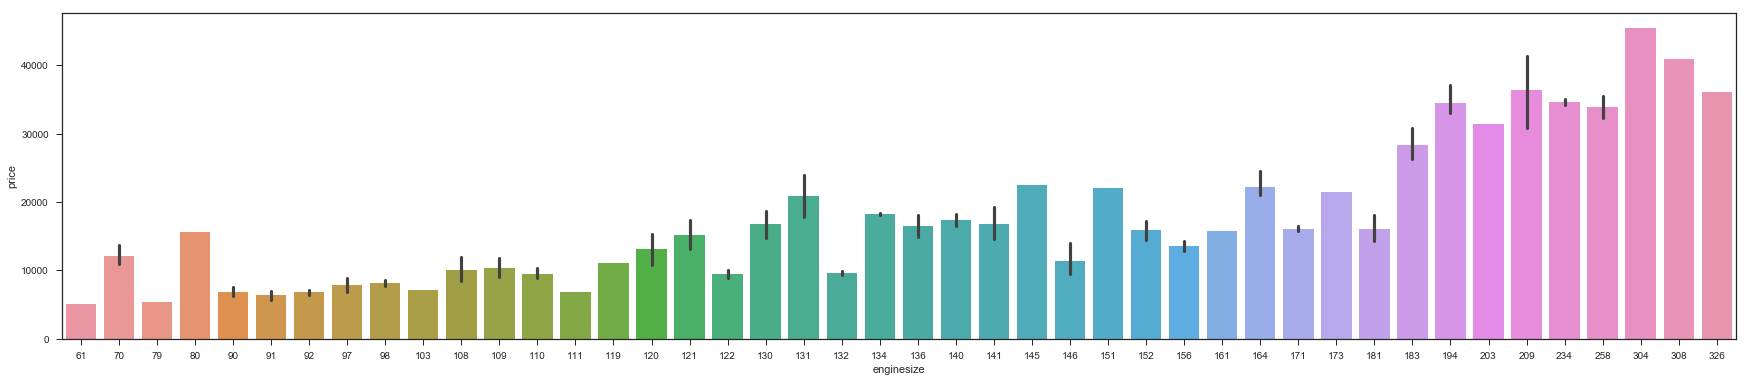

In [798]:
plt.figure(figsize=(30, 6))
plot_cat('enginesize')
#As enginesize increase price of car is increasing

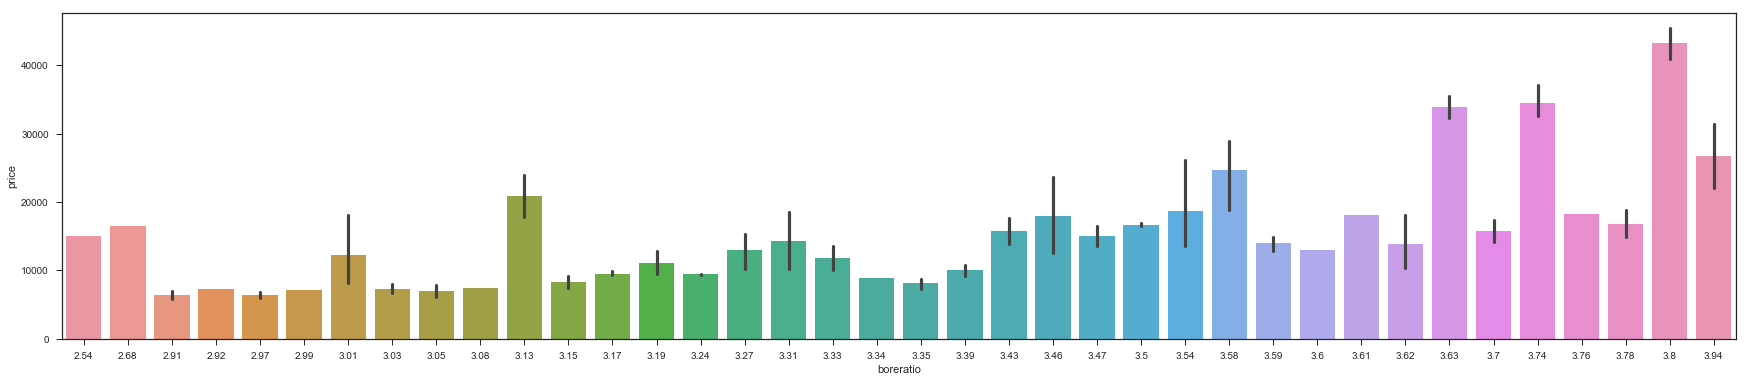

In [799]:
plt.figure(figsize=(30, 6))
plot_cat('boreratio')
#boreratio is not having significant impact on price as it distributed

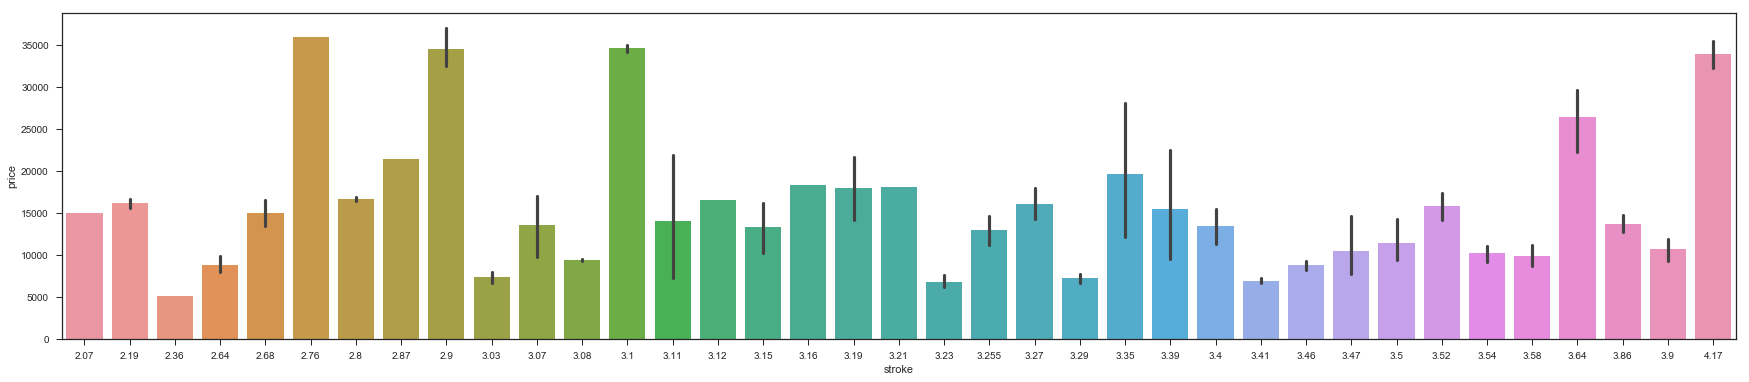

In [800]:
plt.figure(figsize=(30, 6))
plot_cat('stroke')
#stroke is not having significant impact on price as it distributed

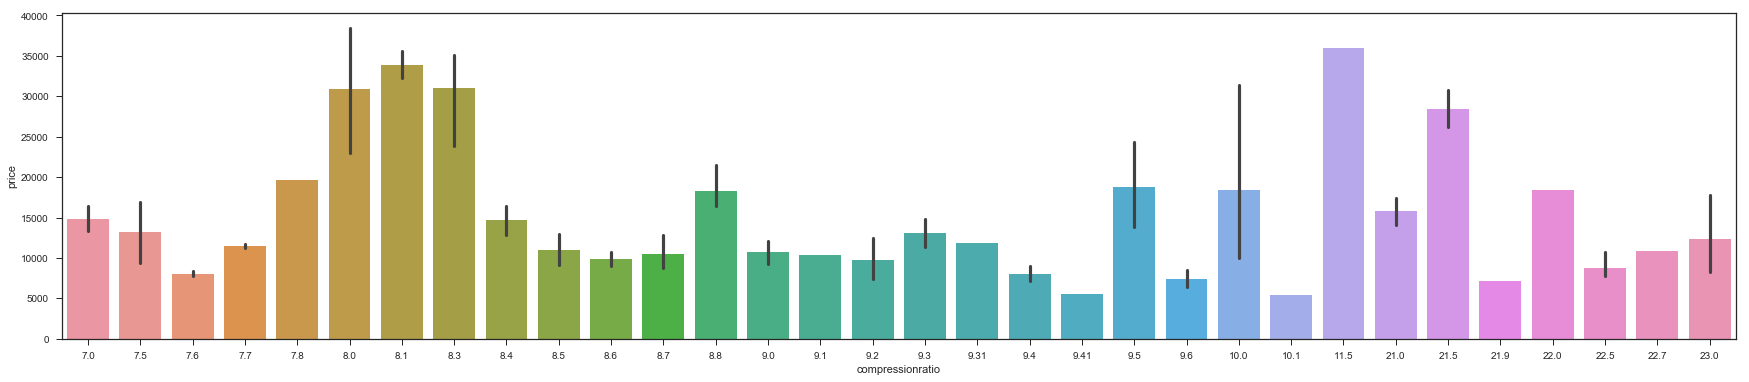

In [801]:
plt.figure(figsize=(30, 6))
plot_cat('compressionratio')
#compressionratio is not having significant impact on price as it distributed

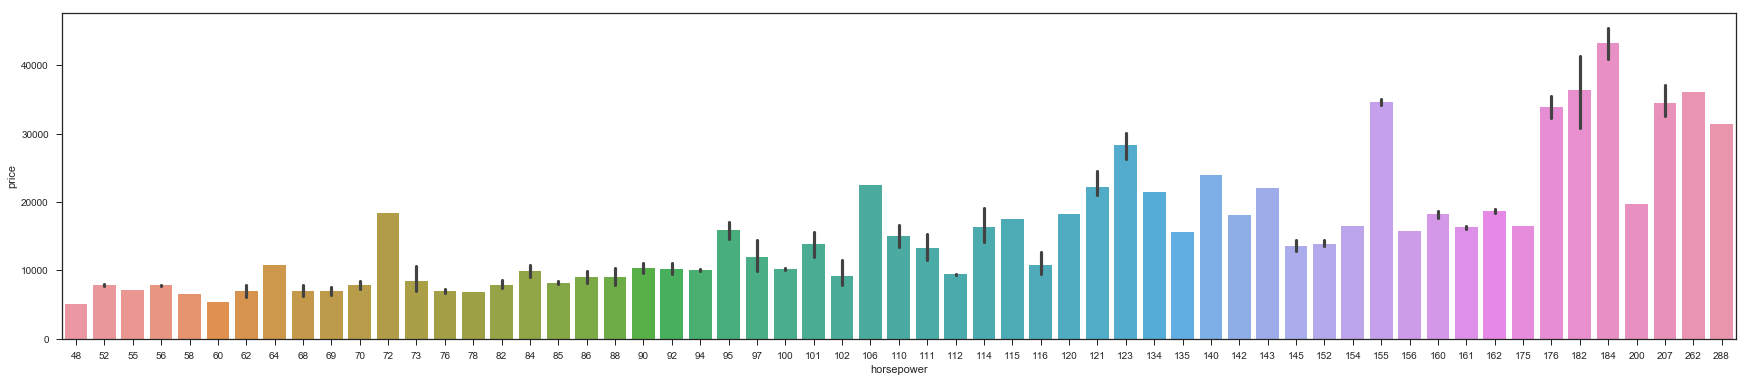

In [802]:
plt.figure(figsize=(30, 6))
plot_cat('horsepower')
#As horsepower increase price of car is increasing

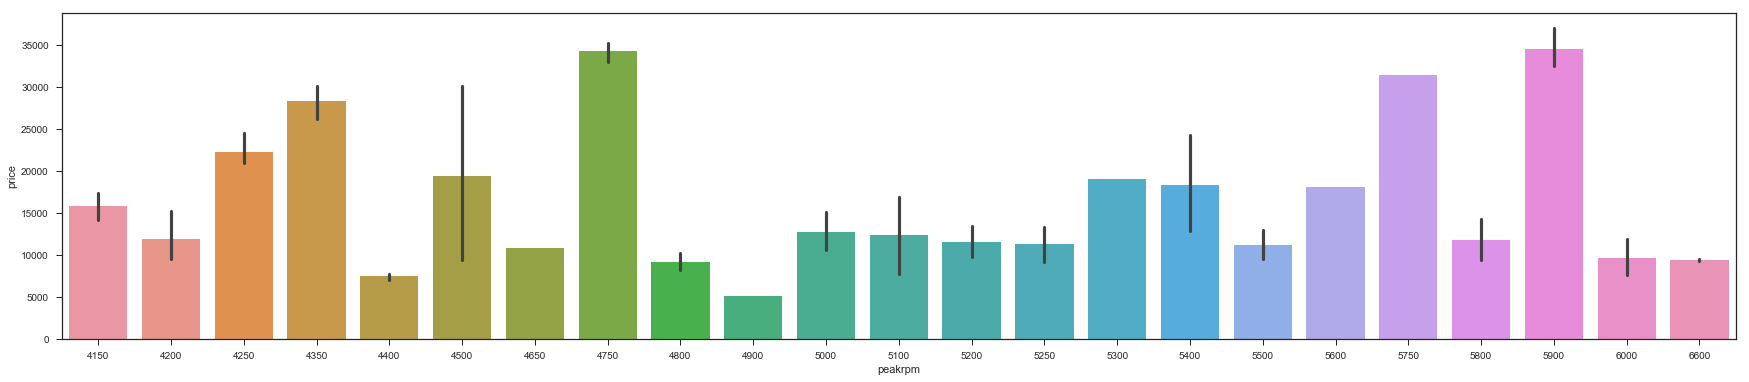

In [803]:
plt.figure(figsize=(30, 6))
plot_cat('peakrpm')
#peakrpm is not having significant impact on price as it is distributed

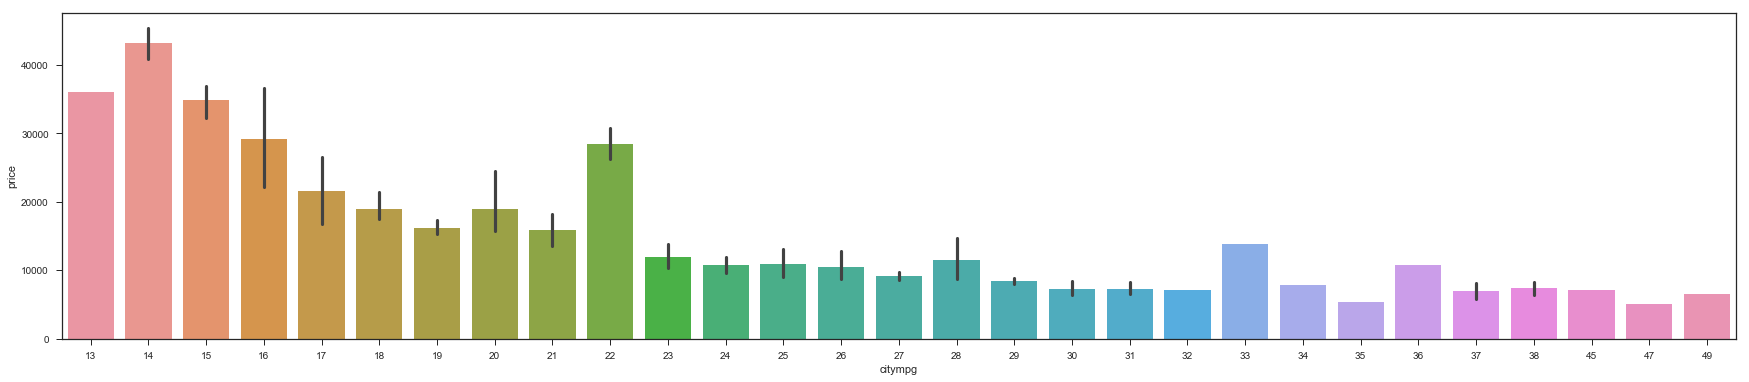

In [804]:
plt.figure(figsize=(30, 6))
plot_cat('citympg')
#As citympg increase price of car is decreasing

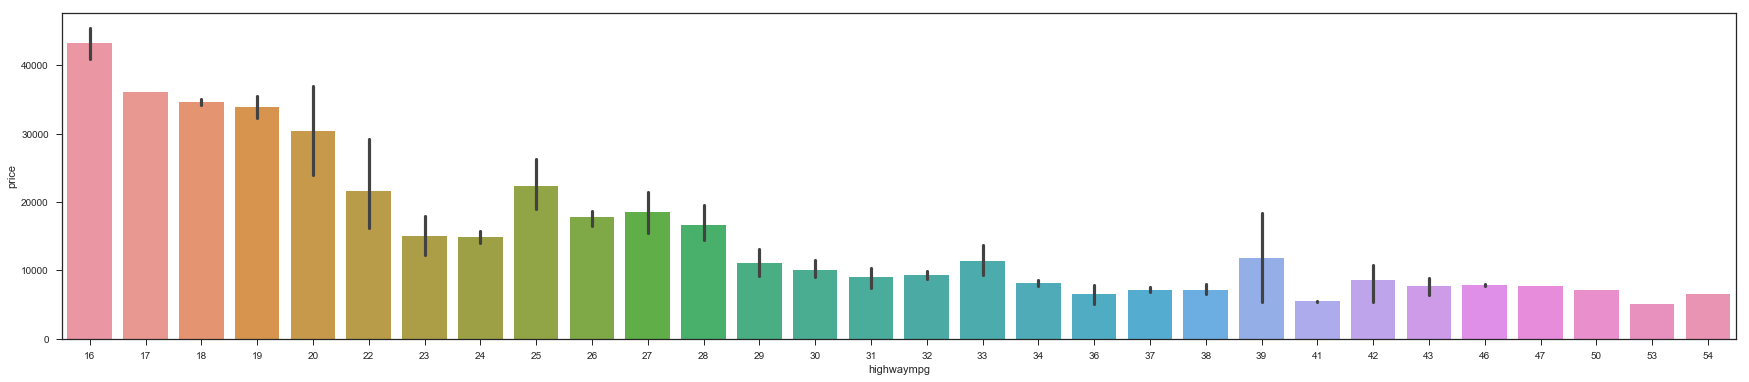

In [805]:
plt.figure(figsize=(30, 6))
plot_cat('highwaympg')
#As highwaympg increase price of car is decreasing

In [806]:
# binning car prices
def car_price(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
        
cardf['car_price'] = cardf['price'].apply(lambda x: car_price(x))

In [807]:
cardf['car_price'].value_counts()

medium       141
high          46
very high     18
Name: car_price, dtype: int64

In [808]:
#check new column dummy derivative variable
print(cardf.head())

   car_ID  symboling carCompany fueltype aspiration doornumber      carbody  \
0       1          3       alfa      gas        std        two  convertible   
1       2          3       alfa      gas        std        two  convertible   
2       3          1       alfa      gas        std        two    hatchback   
3       4          2       audi      gas        std       four        sedan   
4       5          2       audi      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase    ...      fuelsystem  boreratio  \
0        rwd          front       88.6    ...            mpfi       3.47   
1        rwd          front       88.6    ...            mpfi       3.47   
2        rwd          front       94.5    ...            mpfi       2.68   
3        fwd          front       99.8    ...            mpfi       3.19   
4        4wd          front       99.4    ...            mpfi       3.19   

   stroke  compressionratio horsepower peakrpm  citympg highwaympg  

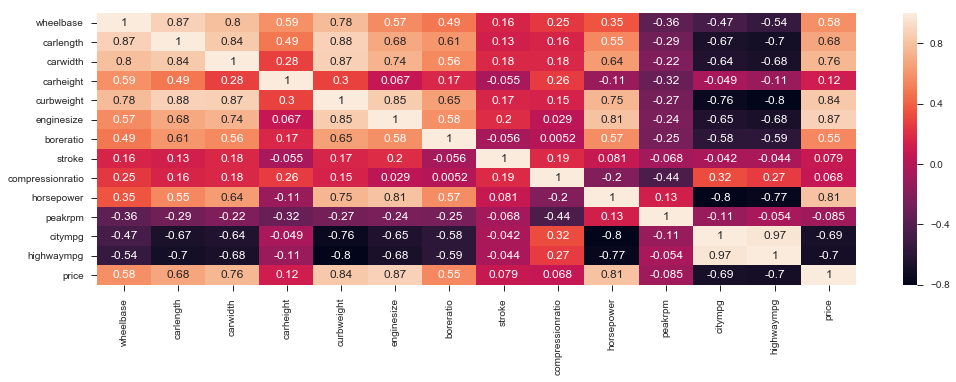

In [809]:
#since Numeric variable didnt give us insight to data
#Lets see correlation across the numerice varible
#wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
cardf_correlation = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']
plt.figure(figsize=(17,5))
sns.heatmap(cardf[cardf_correlation].corr(),annot = True)
plt.show()

In [810]:
#Obeservations > 0.8 corelation variables
#1.)Wheelbase,carlength,carwidth are highly corelated
#2.)citympg and highwaympg are highly corelated 
#3.)enginesize and horsepower are highly corelated

In [811]:
#1.)Create new varible mpg of car based on citympg and highwaympg
cardf['car_mpg'] = round((cardf['citympg']+cardf['highwaympg'])/2,2)
#check new column dummy derivative variable
cardf.head()

,car_ID,symboling,carCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_price,car_mpg
0,1,3,alfa,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,medium,24.0
1,2,3,alfa,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,high,24.0
2,3,1,alfa,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,high,22.5
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,medium,27.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,high,20.0


In [812]:
#checking how pricing linked to car Company
#Group by company name
by_carCompany_df = cardf.groupby(['carCompany'])
#sort companies list based on the total raised_amout_usd of each company
by_carCompany_df['price'].describe()

,count,mean,std,min,25%,50%,75%,max
carCompany,,,,,,,,
alfa,3.0,15498.333333,1734.937559,13495.0,14997.500,16500.0,16500.0000,16500.0
audi,7.0,17859.166714,3151.576876,13950.0,16350.000,17710.0,18389.5835,23875.0
bmw,8.0,26118.750000,9263.832033,16430.0,19958.750,22835.0,32290.0000,41315.0
buick,8.0,33647.000000,6789.560306,25552.0,28230.000,32892.0,36532.0000,45400.0
chevrolet,3.0,6007.000000,754.421633,5151.0,5723.000,6295.0,6435.0000,6575.0
dodge,9.0,7875.444444,2213.386044,5572.0,6377.000,7609.0,8558.0000,12964.0
honda,13.0,8184.692308,2061.672112,5399.0,6855.000,7295.0,9095.0000,12945.0
isuzu,4.0,8916.500000,1740.362462,6785.0,8383.625,8916.5,9449.3750,11048.0
jaguar,3.0,34600.000000,2047.559523,32250.0,33900.000,35550.0,35775.0000,36000.0


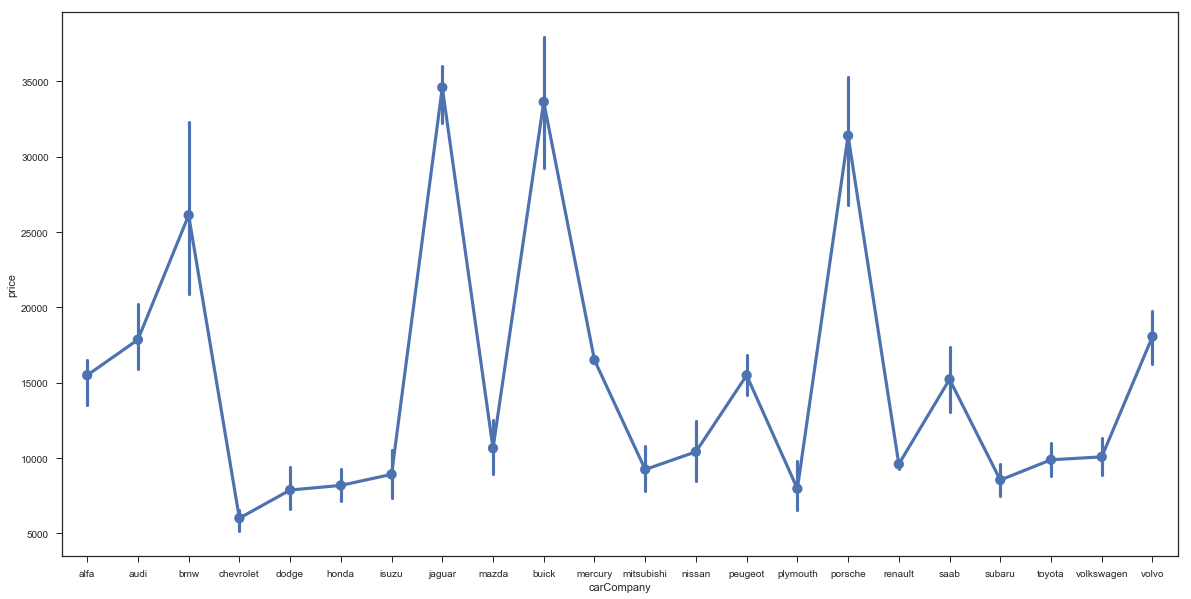

In [813]:
plt.figure(figsize=(20,10))
sns.pointplot(y='price',x='carCompany',data=cardf)
plt.show()

In [814]:
#checking how price category linked to car Company
#Group by company name
by_carCompany_df = cardf.groupby(['carCompany'])
#sort companies list based on the total raised_amout_usd of each company
by_carCompany_df['car_price'].value_counts()

carCompany  car_price
alfa        high          2
            medium        1
audi        high          6
            medium        1
bmw         high          5
            very high     3
buick       very high     8
chevrolet   medium        3
dodge       medium        9
honda       medium       13
isuzu       medium        4
jaguar      very high     3
mazda       medium       14
            high          3
mercury     high          1
mitsubishi  medium       13
nissan      medium       15
            high          3
peugeot     high          7
            medium        4
plymouth    medium        7
porsche     very high     4
            high          1
renault     medium        2
saab        high          4
            medium        2
subaru      medium       12
toyota      medium       27
            high          5
volkswagen  medium       12
volvo       high          9
            medium        2
Name: car_price, dtype: int64

# Selection of variables and Normalising the required categorical variables values

In [815]:
#droping less impact variables


cardf.drop(['fueltype'],axis=1,inplace=True)# Not relevant for anlysis
cardf.drop('stroke',1, inplace = True) # Not relevant for anlysis
cardf.drop('compressionratio',1, inplace = True) # Not relevant for anlysis
cardf.drop('peakrpm',1, inplace = True) # Not relevant for anlysis
cardf.drop('citympg',1, inplace = True) # Not relevant for anlysis as new derived varible car_mpg is used
cardf.drop('highwaympg',1, inplace = True) # # Not relevant for anlysis as new derived varible car_mpg is used


In [816]:
print(cardf.shape)

(205, 22)


In [817]:
def nor_symbol(n):
        return n+2


In [818]:
#verify the transformed values
print("symboling:",cardf['symboling'].unique())
print("aspiration:",cardf['aspiration'].unique())
print("doornumber:",cardf['doornumber'].unique())
print("cylindernumber:",cardf['cylindernumber'].unique())

symboling: [ 3  1  2  0 -1 -2]
aspiration: ['std' 'turbo']
doornumber: ['two' 'four']
cylindernumber: ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


In [819]:
#changing values for normalisation

#cardf['symboling'] = cardf['aspiration'].map({-2:0,-1:1,0:2,1:3,2:4,3:5}) 
#failed normalization so writing function
cardf['carbody'] = cardf['carbody'].map({'convertible':0, 'hatchback':1,'sedan':1, 'wagon':1,'hardtop':0}) #from EDA keeping low price as 1 and high price as 0
cardf['enginelocation_front'] = cardf['enginelocation'].map({'rear':0, 'front':1}) #since rear is high willmake it 0 to check on front engine location
cardf['drivewheel'] = cardf['drivewheel'].map({'4wd':1, 'fwd':2, 'rwd':0})   #since rwd is more price we will only see how fwd or 4wd impact price     
cardf['symboling'] = cardf['symboling'].apply(lambda x: nor_symbol(x))

cardf['aspiration'] = cardf['aspiration'].map({'std':0, 'turbo':1}) 
cardf['doornumber'] = cardf['doornumber'].map({'two': 0,'four': 1})
cardf['cylindernumber'] = cardf['cylindernumber'].map({'four':4, 'two':2, 'five':5, 'six':6, 'eight':8, 'three':3, 'twelve':12})

In [820]:
#verify the transformed values
print("enginelocation_front:",cardf['enginelocation_front'].unique())
print("drivewheel:",cardf['drivewheel'].unique())
print("symboling:",cardf['symboling'].unique())
print("aspiration:",cardf['aspiration'].unique())
print("doornumber:",cardf['doornumber'].unique())
print("cylindernumber:",cardf['cylindernumber'].unique())

enginelocation_front: [1 0]
drivewheel: [0 2 1]
symboling: [5 3 4 2 1 0]
aspiration: [0 1]
doornumber: [0 1]
cylindernumber: [ 4  6  5  3 12  2  8]


In [821]:
cardf.drop(['carCompany'],axis=1,inplace=True)# Not relevant for anlysis as carCompany does matter for new Geely Auto aspires to enter the US market 

In [822]:
cardf.head()

,car_ID,symboling,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,price,car_price,car_mpg,enginelocation_front
0,1,5,0,0,0,0,front,88.6,168.8,64.1,...,dohc,4,130,mpfi,3.47,111,13495.0,medium,24.0,1
1,2,5,0,0,0,0,front,88.6,168.8,64.1,...,dohc,4,130,mpfi,3.47,111,16500.0,high,24.0,1
2,3,3,0,0,1,0,front,94.5,171.2,65.5,...,ohcv,6,152,mpfi,2.68,154,16500.0,high,22.5,1
3,4,4,0,1,1,2,front,99.8,176.6,66.2,...,ohc,4,109,mpfi,3.19,102,13950.0,medium,27.0,1
4,5,4,0,1,1,1,front,99.4,176.6,66.4,...,ohc,5,136,mpfi,3.19,115,17450.0,high,20.0,1


In [823]:
cardf.drop(['enginelocation'],axis=1,inplace=True)# Not relevant for anlysis 
cardf.drop(['fuelsystem'],axis=1,inplace=True)# Not relevant for anlysis
cardf.drop(['enginetype'],axis=1,inplace=True)# Not relevant for anlysis
cardf.drop(['car_price'],axis=1,inplace=True)# Not relevant for anlysis

In [824]:
cardf.head()

,car_ID,symboling,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,horsepower,price,car_mpg,enginelocation_front
0,1,5,0,0,0,0,88.6,168.8,64.1,48.8,2548,4,130,3.47,111,13495.0,24.0,1
1,2,5,0,0,0,0,88.6,168.8,64.1,48.8,2548,4,130,3.47,111,16500.0,24.0,1
2,3,3,0,0,1,0,94.5,171.2,65.5,52.4,2823,6,152,2.68,154,16500.0,22.5,1
3,4,4,0,1,1,2,99.8,176.6,66.2,54.3,2337,4,109,3.19,102,13950.0,27.0,1
4,5,4,0,1,1,1,99.4,176.6,66.4,54.3,2824,5,136,3.19,115,17450.0,20.0,1


In [825]:
cardf.drop(['car_ID'],axis=1,inplace=True)# Not relevant for anlysis as its unique parameter

In [826]:
cardf.head()

,symboling,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,horsepower,price,car_mpg,enginelocation_front
0,5,0,0,0,0,88.6,168.8,64.1,48.8,2548,4,130,3.47,111,13495.0,24.0,1
1,5,0,0,0,0,88.6,168.8,64.1,48.8,2548,4,130,3.47,111,16500.0,24.0,1
2,3,0,0,1,0,94.5,171.2,65.5,52.4,2823,6,152,2.68,154,16500.0,22.5,1
3,4,0,1,1,2,99.8,176.6,66.2,54.3,2337,4,109,3.19,102,13950.0,27.0,1
4,4,0,1,1,1,99.4,176.6,66.4,54.3,2824,5,136,3.19,115,17450.0,20.0,1


In [827]:
#defining a normalisation function 
def normalize (x): 
    return ( (x-np.mean(x))/ (max(x) - min(x)))
  
                                       
# applying normalize ( ) to all columns 
cardf = cardf.apply(normalize)                                          
       

In [828]:
cardf.head()

,symboling,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,horsepower,price,car_mpg,enginelocation_front
0,0.433171,-0.180488,-0.560976,-0.931707,-0.607317,-0.296110,-0.078347,-0.150650,-0.410407,-0.002935,-0.038049,0.011671,0.100174,0.028679,0.005419,-0.109188,0.014634
1,0.433171,-0.180488,-0.560976,-0.931707,-0.607317,-0.296110,-0.078347,-0.150650,-0.410407,-0.002935,-0.038049,0.011671,0.100174,0.028679,0.080018,-0.109188,0.014634
2,0.033171,-0.180488,-0.560976,0.068293,-0.607317,-0.124099,-0.042526,-0.033984,-0.110407,0.103737,0.161951,0.094689,-0.464111,0.207846,0.080018,-0.150284,0.014634
3,0.233171,-0.180488,0.439024,0.068293,0.392683,0.030420,0.038071,0.024350,0.047927,-0.084781,-0.038049,-0.067575,-0.099826,-0.008821,0.016714,-0.026996,0.014634
4,0.233171,-0.180488,0.439024,0.068293,-0.107317,0.018758,0.038071,0.041016,0.047927,0.104125,0.061951,0.034312,-0.099826,0.045346,0.103602,-0.218777,0.014634


In [880]:
#Model 1 
#Putting feature variable to X
X = cardf[['symboling','aspiration','doornumber','carbody','drivewheel','wheelbase','carlength','carwidth','carheight','curbweight','cylindernumber','enginesize','boreratio','horsepower','car_mpg','enginelocation_front']]

# Putting response variable to y
y = cardf['price']

In [881]:
from sklearn.linear_model import LinearRegression

In [882]:
# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

In [883]:
# fit the model to the training data
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [884]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_1 = sm.OLS(y,X).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     80.53
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           4.89e-75
Time:                        09:58:19   Log-Likelihood:                 252.53
No. Observations:                 205   AIC:                            -471.1
Df Residuals:                     188   BIC:                            -414.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 3.296e-17 

In [885]:
# Importing RFE and LinearRegression
#Using to compare automatic procedure to remove insignificant variables
from sklearn.feature_selection import RFE
#random_state is the seed used by the random number generator, it can be any integer.
from sklearn.cross_validation import train_test_split

In [886]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)
rfe = RFE(lm, 9)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [887]:
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)  

[False False False False False  True False  True  True False  True  True
  True  True  True False  True]
[9 5 8 7 3 1 4 1 1 2 1 1 1 1 1 6 1]


In [888]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [889]:
#checking vif value
# Calculating Vif value
vif_cal(input_data=cardf, dependent_col="price")


,Var,Vif
9,curbweight,19.61
11,enginesize,18.22
6,carlength,10.23
5,wheelbase,10.00
10,cylindernumber,7.99
13,horsepower,7.87
7,carwidth,6.56
14,car_mpg,4.43
12,boreratio,3.20
4,drivewheel,3.14


In [890]:
# Calculating Vif value after dropping curbweight
vif_cal(input_data=cardf.drop(['curbweight'], axis=1), dependent_col="price")

,Var,Vif
10,enginesize,13.53
5,wheelbase,9.94
6,carlength,9.23
12,horsepower,7.87
9,cylindernumber,7.84
7,carwidth,5.88
13,car_mpg,4.13
11,boreratio,3.11
0,symboling,2.67
8,carheight,2.49


In [891]:
#Model 2
# Putting feature variable to X
X1 = cardf[['symboling','aspiration','doornumber','carbody','drivewheel','wheelbase','carlength','carwidth','carheight','cylindernumber','enginesize','boreratio','horsepower','car_mpg','enginelocation_front']]

# Putting response variable to y
y = cardf['price']

In [892]:
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X1 = sm.add_constant(X1)
# create a fitted model in one line
lm_2 = sm.OLS(y,X1).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     86.35
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           5.18e-76
Time:                        09:58:22   Log-Likelihood:                 252.53
No. Observations:                 205   AIC:                            -473.1
Df Residuals:                     189   BIC:                            -419.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 3.296e-17 

In [893]:
# Calculating Vif value after dropping curbweight,wheelbase,carlength
#wheelbase,carlength have similar vif
vif_cal(input_data=cardf.drop(['curbweight','wheelbase','carlength'], axis=1), dependent_col="price")

,Var,Vif
8,enginesize,10.54
10,horsepower,7.23
7,cylindernumber,7.00
11,car_mpg,3.69
5,carwidth,3.41
9,boreratio,3.01
0,symboling,2.33
2,doornumber,2.21
4,drivewheel,2.00
6,carheight,1.81


In [894]:
# Calculating Vif value after dropping curbweight,wheelbase,carlength,horsepower,cylindernumber
#horsepower,cylindernumber have similar vif
vif_cal(input_data=cardf.drop(['curbweight','wheelbase','carlength','horsepower','cylindernumber'], axis=1), dependent_col="price")

,Var,Vif
5,carwidth,3.40
7,enginesize,3.26
9,car_mpg,2.52
0,symboling,2.24
2,doornumber,2.17
8,boreratio,2.05
4,drivewheel,1.98
6,carheight,1.66
3,carbody,1.54
10,enginelocation_front,1.37


In [895]:
#Model3

# Putting feature variable to X
X2 = cardf[['symboling','aspiration','doornumber','carbody','drivewheel','carwidth','carheight','enginesize','boreratio','car_mpg','enginelocation_front']]

# Putting response variable to y
y = cardf['price']

In [896]:
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X2 = sm.add_constant(X2)
# create a fitted model in one line
lm_3 = sm.OLS(y,X2).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     115.0
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           1.76e-78
Time:                        09:58:24   Log-Likelihood:                 248.55
No. Observations:                 205   AIC:                            -473.1
Df Residuals:                     193   BIC:                            -433.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 3.296e-17 

In [897]:
# Calculating Vif value after dropping curbweight,wheelbase,carlength,horsepower,cylindernumber,doornumber,carbody,carwidth,carheight
#cylindernumber,doornumber,carbody,carwidth,carheight have high vif
vif_cal(input_data=cardf.drop(['curbweight','wheelbase','carlength','horsepower','cylindernumber','doornumber','carbody','carwidth','carheight'], axis=1), dependent_col="price")

,Var,Vif
5,car_mpg,2.30
3,enginesize,2.15
4,boreratio,1.97
2,drivewheel,1.84
6,enginelocation_front,1.13
0,symboling,1.11
1,aspiration,1.09


In [898]:
#Model4

# Putting feature variable to X
X3 = cardf[['symboling','aspiration','drivewheel','enginesize','boreratio','car_mpg','enginelocation_front']]

# Putting response variable to y
y = cardf['price']

In [899]:
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X3 = sm.add_constant(X3)
# create a fitted model in one line
lm_4 = sm.OLS(y,X3).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     143.8
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           7.55e-74
Time:                        09:58:25   Log-Likelihood:                 226.76
No. Observations:                 205   AIC:                            -437.5
Df Residuals:                     197   BIC:                            -410.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 3.296e-17 

In [900]:
# Calculating Vif value after dropping curbweight,wheelbase,carlength,horsepower,cylindernumber,doornumber,carbody,carwidth,carheight
#since symboling p value is high lets drop 
vif_cal(input_data=cardf.drop(['curbweight','wheelbase','carlength','horsepower','cylindernumber','doornumber','carbody','carwidth','carheight','symboling'], axis=1), dependent_col="price")

,Var,Vif
4,car_mpg,2.24
2,enginesize,2.12
3,boreratio,1.94
1,drivewheel,1.83
0,aspiration,1.09
5,enginelocation_front,1.06


In [901]:
#Model5

# Putting feature variable to X
X4 = cardf[['aspiration','drivewheel','enginesize','boreratio','car_mpg','enginelocation_front']]

# Putting response variable to y
y = cardf['price']

In [902]:
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X4 = sm.add_constant(X4)
# create a fitted model in one line
lm_5 = sm.OLS(y,X4).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     167.2
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           1.08e-74
Time:                        09:58:26   Log-Likelihood:                 226.08
No. Observations:                 205   AIC:                            -438.2
Df Residuals:                     198   BIC:                            -414.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 3.296e-17 

In [903]:
#After removing symboling R-squared and Adj. R-squared decreased and boreratio p value increase 
#hence add back symboling and remove boreratio

In [904]:
#Model6

# Putting feature variable to X
X5 = cardf[['aspiration','drivewheel','enginesize','symboling','car_mpg','enginelocation_front']]

# Putting response variable to y
y = cardf['price']

In [905]:
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X5 = sm.add_constant(X5)
# create a fitted model in one line
lm_6 = sm.OLS(y,X5).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     163.2
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           7.79e-74
Time:                        09:58:27   Log-Likelihood:                 224.02
No. Observations:                 205   AIC:                            -434.0
Df Residuals:                     198   BIC:                            -410.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 3.296e-17 

In [906]:
#Model7
#remove symboling  as it didnot improve the model and p value is high
# Putting feature variable to X
X6 = cardf[['aspiration','drivewheel','enginesize','car_mpg','enginelocation_front']]

# Putting response variable to y
y = cardf['price']

In [907]:
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X6 = sm.add_constant(X6)
# create a fitted model in one line
lm_7 = sm.OLS(y,X6).fit()
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     196.0
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           7.67e-75
Time:                        09:58:27   Log-Likelihood:                 223.63
No. Observations:                 205   AIC:                            -435.3
Df Residuals:                     199   BIC:                            -415.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 3.296e-17 

In [947]:
#Model8
#remove aspiration as pvalue is more andlet see the R-squared impact
# Putting feature variable to X
X7 = cardf[['drivewheel','enginesize','car_mpg','enginelocation_front']]

# Putting response variable to y
y = cardf['price']

In [975]:
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X7 = sm.add_constant(X7)
# create a fitted model in one line
lm_8 = sm.OLS(y,X7).fit()
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     239.3
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           4.89e-75
Time:                        10:56:27   Log-Likelihood:                 221.20
No. Observations:                 205   AIC:                            -432.4
Df Residuals:                     200   BIC:                            -415.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 3.296e-17 

# Making Predictions and Model Evaluation 
#using 
#Actual and predicted charts
#Error Terms charts

In [984]:
# Making predictions using the model for model 8

X_train7, X_test7, y_train7, y_test7 = train_test_split(X7, y, train_size=0.7 ,test_size = 0.3, random_state=100)

X7 = sm.add_constant(X7)
y_pred7 = lm_8.predict(X_test7)
mse7 = mean_squared_error(y_test7, y_pred7)
r_squared7 = r2_score(y_test7, y_pred7)
print('Mean_Squared_Error :' ,mse7)
print('r_square_value :',r_squared7)

Mean_Squared_Error : 0.0067225788734431545
r_square_value : 0.8442315732153487


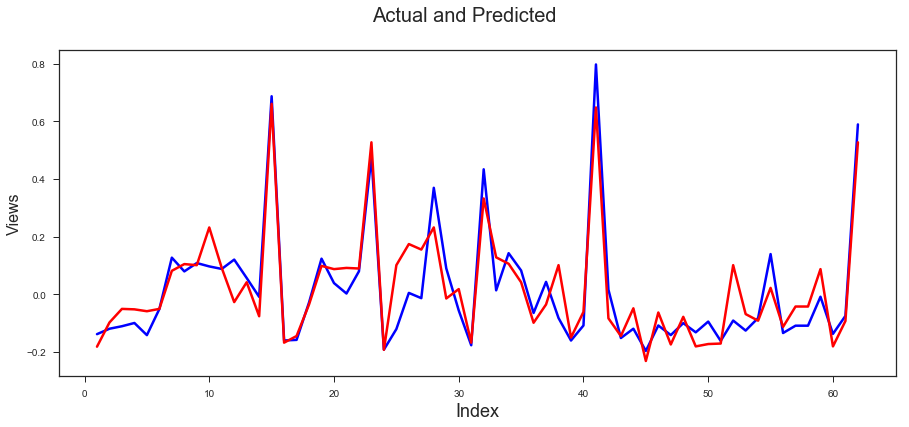

In [985]:
#Actual vs Predicted for model 8
c = [i for i in range(1,63,1)]
fig = plt.figure(figsize=(15,6))
plt.plot(c,y_test7, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred7, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)  
plt.show()

Text(0,0.5,'ytest-ypred')

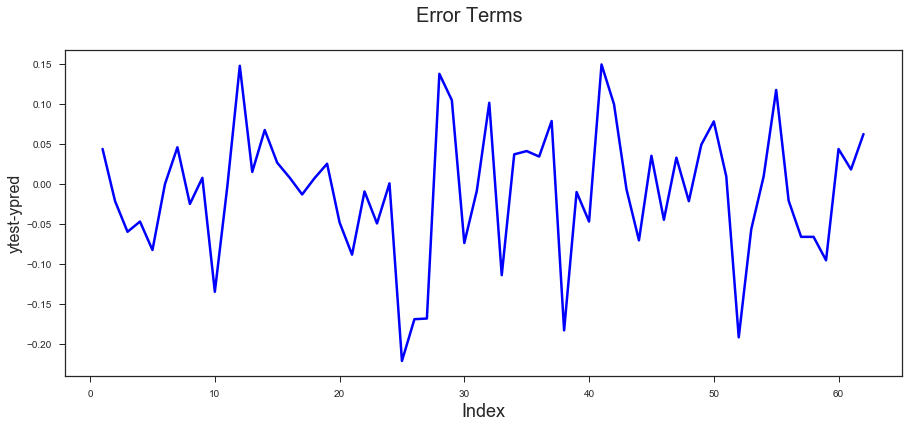

In [986]:
# Error terms for model 8
c = [i for i in range(1,63,1)]
fig = plt.figure(figsize=(15,6))
plt.plot(c,y_test7-y_pred7, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

Text(0,0.5,'y_pred')

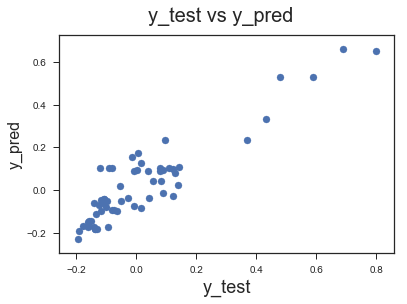

In [1006]:
# Plotting y_test and y_pred to understand the spread for model 8.
fig = plt.figure()
plt.scatter(y_test7,y_pred7)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Text(0,0.5,'Index')

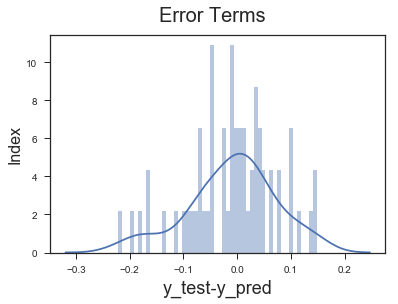

In [1007]:
# Plotting the error terms to understand the distribution model 8
fig = plt.figure()
sns.distplot((y_test7-y_pred7),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label

In [1008]:
# Now let's check the Root Mean Square Error of model 8
import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test7, y_pred7)))

RMSE : 0.08199133413625585


In [989]:
# Making predictions using the model for model 7
X_train6, X_test6, y_train6, y_test6 = train_test_split(X6, y, train_size=0.7 ,test_size = 0.3, random_state=100)

X6 = sm.add_constant(X6)
y_pred6 = lm_7.predict(X_test6)
mse6= mean_squared_error(y_test6, y_pred6)
r_squared6 = r2_score(y_test6, y_pred6)
print('Mean_Squared_Error :' ,mse6)
print('r_square_value :',r_squared6)

Mean_Squared_Error : 0.006691722593660753
r_square_value : 0.8449465420165507


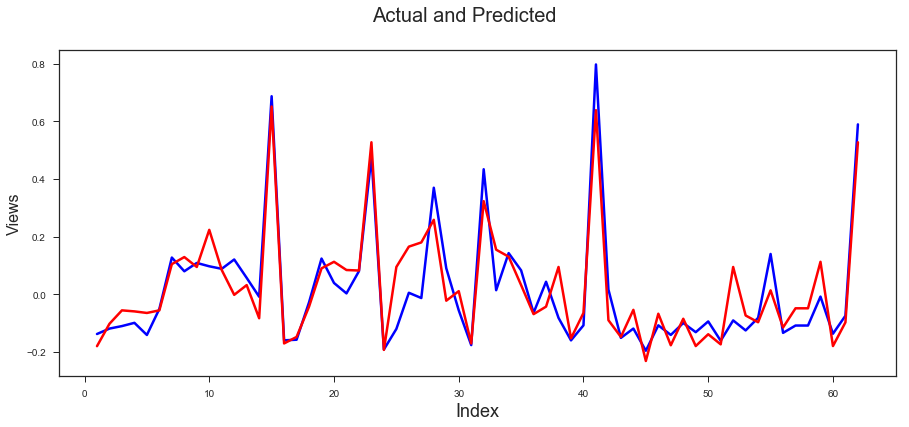

In [990]:
#Actual vs Predicted for model 7
c = [i for i in range(1,63,1)]
fig = plt.figure(figsize=(15,6))
plt.plot(c,y_test6, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred6, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)  
plt.show()

Text(0,0.5,'ytest-ypred')

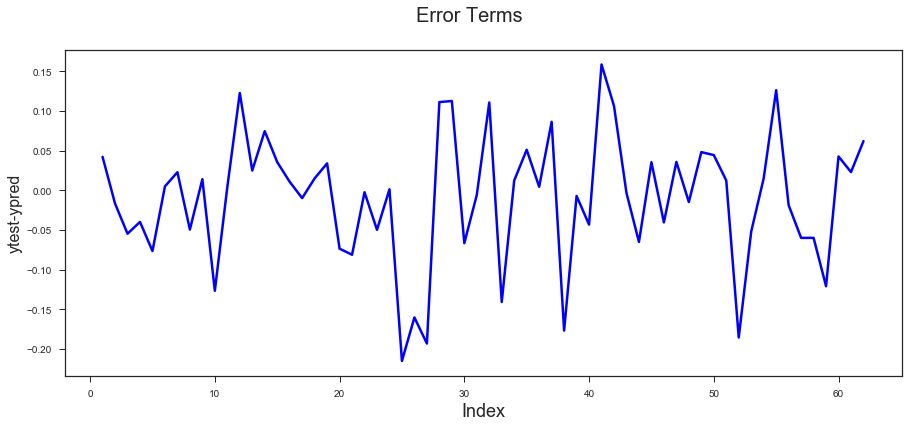

In [992]:
# Error terms for model 7
c = [i for i in range(1,63,1)]
fig = plt.figure(figsize=(15,6))
plt.plot(c,y_test6-y_pred6, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

Text(0,0.5,'y_pred')

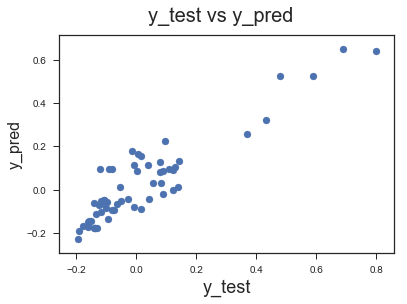

In [1002]:
# Plotting y_test and y_pred to understand the spread for model 7.
fig = plt.figure()
plt.scatter(y_test6,y_pred6)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Text(0,0.5,'Index')

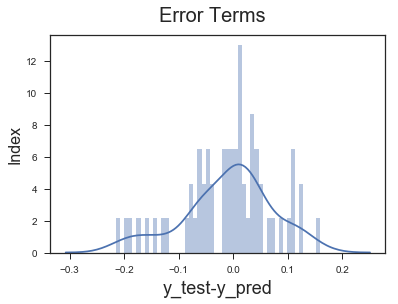

In [1004]:
# Plotting the error terms to understand the distribution model 7
fig = plt.figure()
sns.distplot((y_test6-y_pred6),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label

In [1005]:
# Now let's check the Root Mean Square Error of model 7
import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test6, y_pred6)))

RMSE : 0.08180294978581612


In [995]:
# Making predictions using the model for model 6
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y, train_size=0.7 ,test_size = 0.3, random_state=100)

X5 = sm.add_constant(X5)
y_pred5 = lm_6.predict(X_test5)
mse5= mean_squared_error(y_test5, y_pred5)
r_squared5 = r2_score(y_test5, y_pred5)
print('Mean_Squared_Error :' ,mse5)
print('r_square_value :',r_squared5)

Mean_Squared_Error : 0.0065516920306222535
r_square_value : 0.8481911808548459


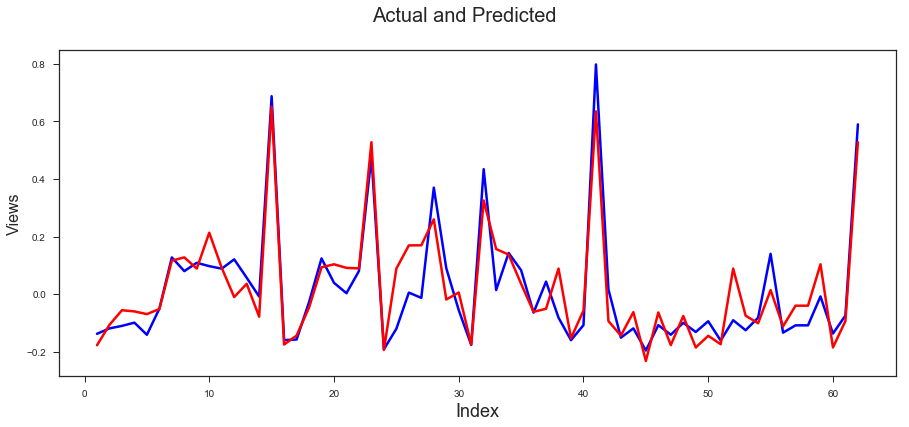

In [997]:
#Actual vs Predicted for model 6
c = [i for i in range(1,63,1)]
fig = plt.figure(figsize=(15,6))
plt.plot(c,y_test5, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred5, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)  
plt.show()

Text(0,0.5,'ytest-ypred')

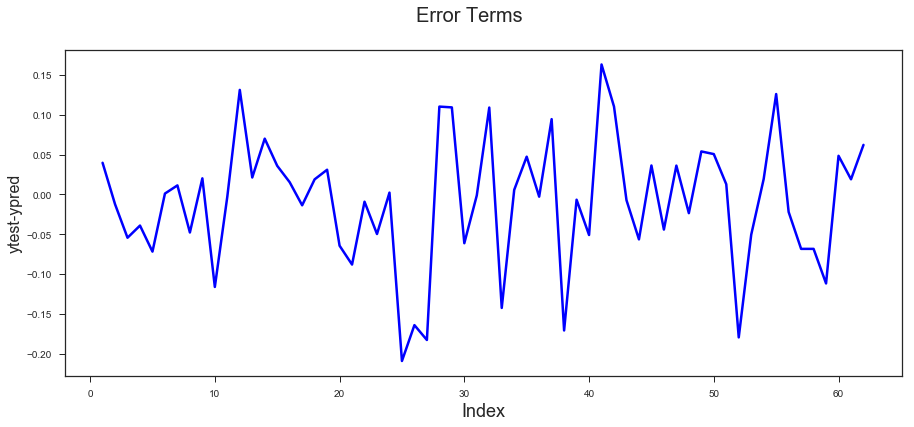

In [998]:
# Error terms for model 6
c = [i for i in range(1,63,1)]
fig = plt.figure(figsize=(15,6))
plt.plot(c,y_test5-y_pred5, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

Text(0,0.5,'y_pred')

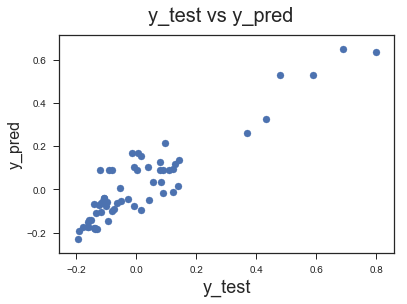

In [1003]:
# Plotting y_test and y_pred to understand the spread for model 6
fig = plt.figure()
plt.scatter(y_test5,y_pred5)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Text(0,0.5,'Index')

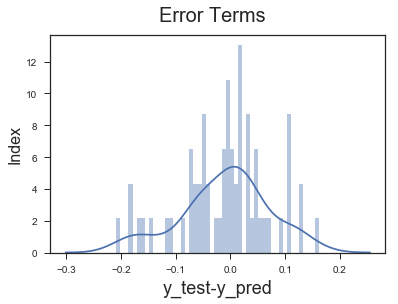

In [1000]:
# Plotting the error terms to understand the distribution model 6
fig = plt.figure()
sns.distplot((y_test5-y_pred5),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label

In [1001]:
# Now let's check the Root Mean Square Error of model 6
import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test5, y_pred5)))

RMSE : 0.08094252300628053


# Conclusion

Model 6 with parameters - 'aspiration','drivewheel','enginesize','symboling','car_mpg','enginelocation_front'
Seems to have stable R-squared:0.832 ,Adj. R-squared:0.827 and RMSE : 0.08094252300628053

In [ ]:
# Assignment- Linear Regression:ENDS - 24 June 2018